## Problem Statement
1. What are the most important factors that affect medical expenses?
2. How well can machine learning models predict medical expenses?
3. How can machine learning models be used to improve the efficiency and profitability of health insurance companies?

## About Dataset
The medical insurance dataset contains information about a number of factors that can affect medical expenses,including age,sex,BMI,smoking status , number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.
#### This dataset contains 2.7k rows and 7 columns

## Importing Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Inspecting Data and Groups

In [7]:
df = pd.read_csv('Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(2772, 7)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

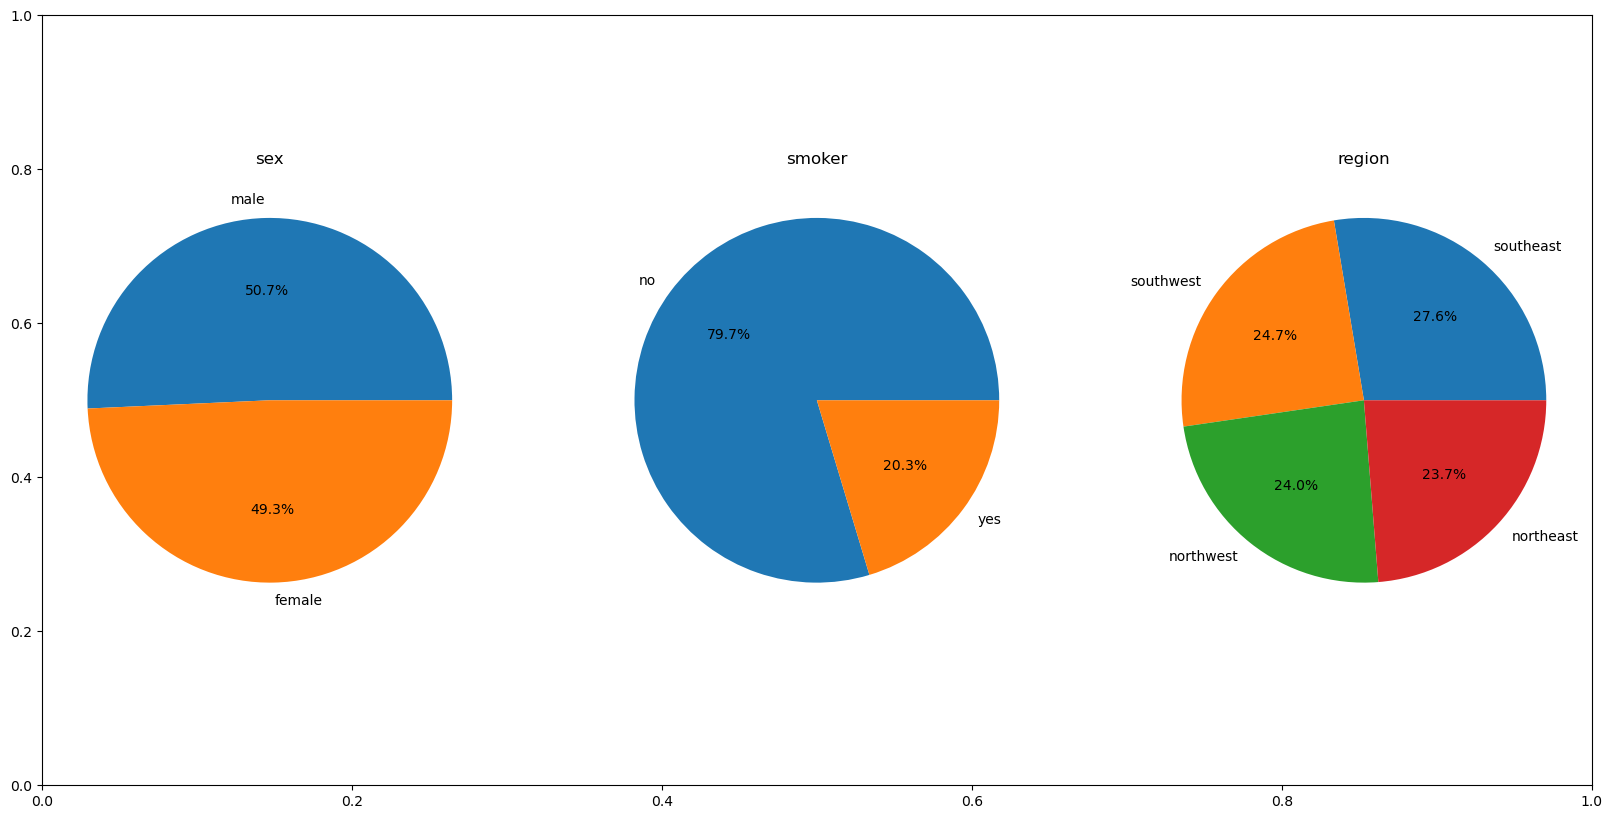

In [13]:
features = ['sex','smoker','region']
plt.subplots(figsize = (20,10))
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    x = df[col].value_counts()
    plt.pie(x.values,labels = x.index,autopct = '%1.1f%%')
    plt.title(col)
plt.show()


The data is equally distributed among sex and region but in smoker column we can observe a ratio of 80:20

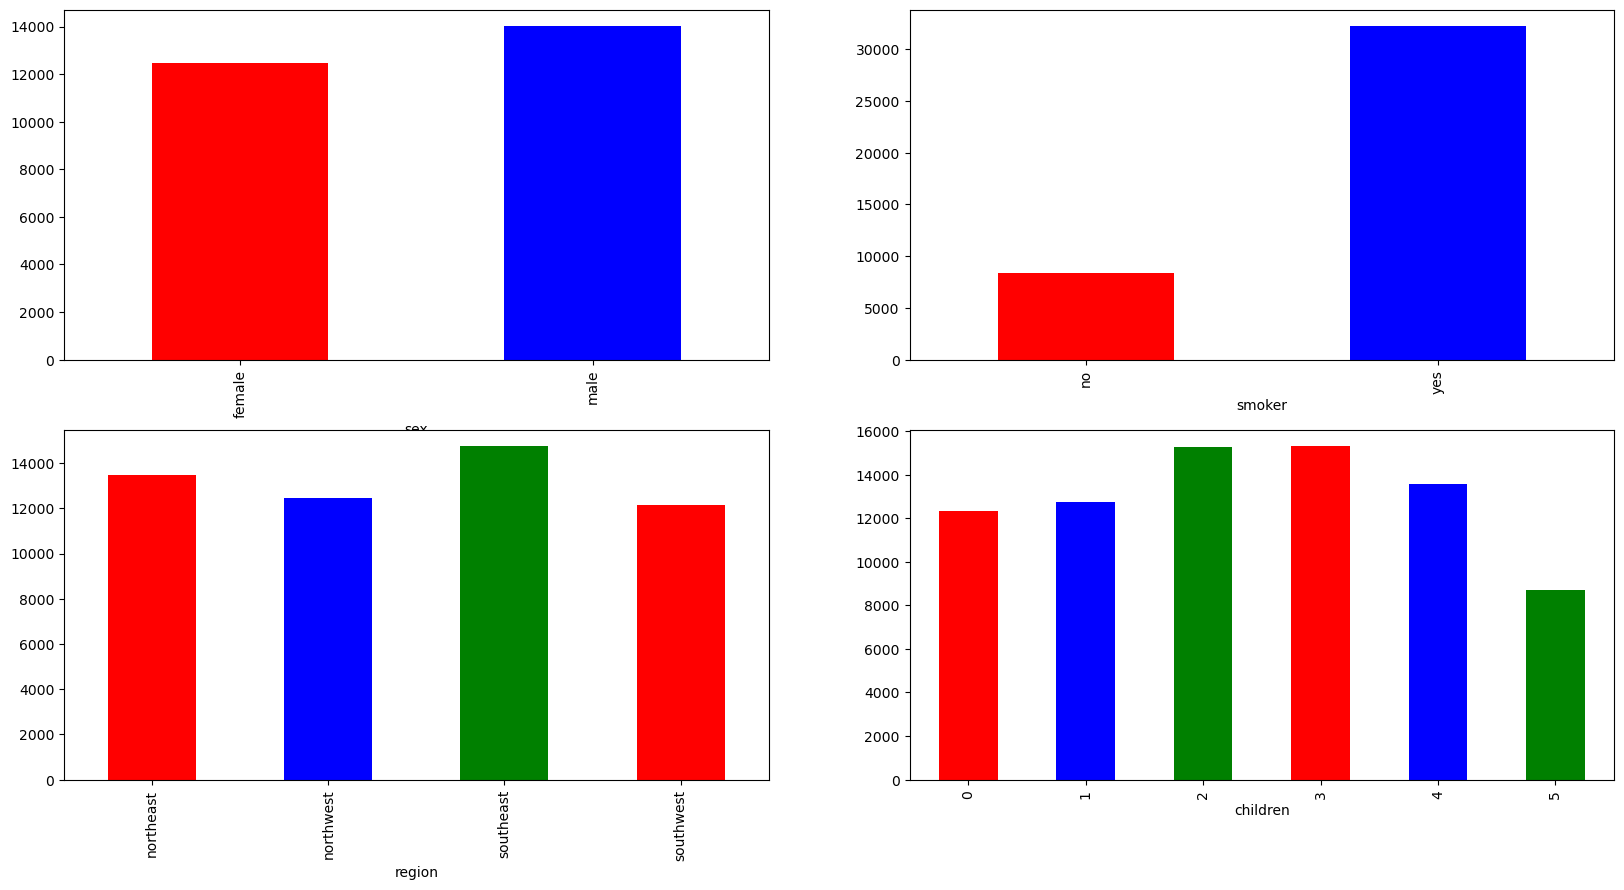

In [15]:
features = ['sex','smoker','region','children']
plt.subplots(nrows=2,ncols=2,figsize = (20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    df.groupby(col)['charges'].mean().plot(kind = 'bar' ,color = ['r','b','g'])
plt.show()


- Charges are on higher side for males as compared to females but the diff is not much
- Premeium charged from the smoker is around thrice that which is charged from non- smokers
- Charges are approximately the same is the given four regions

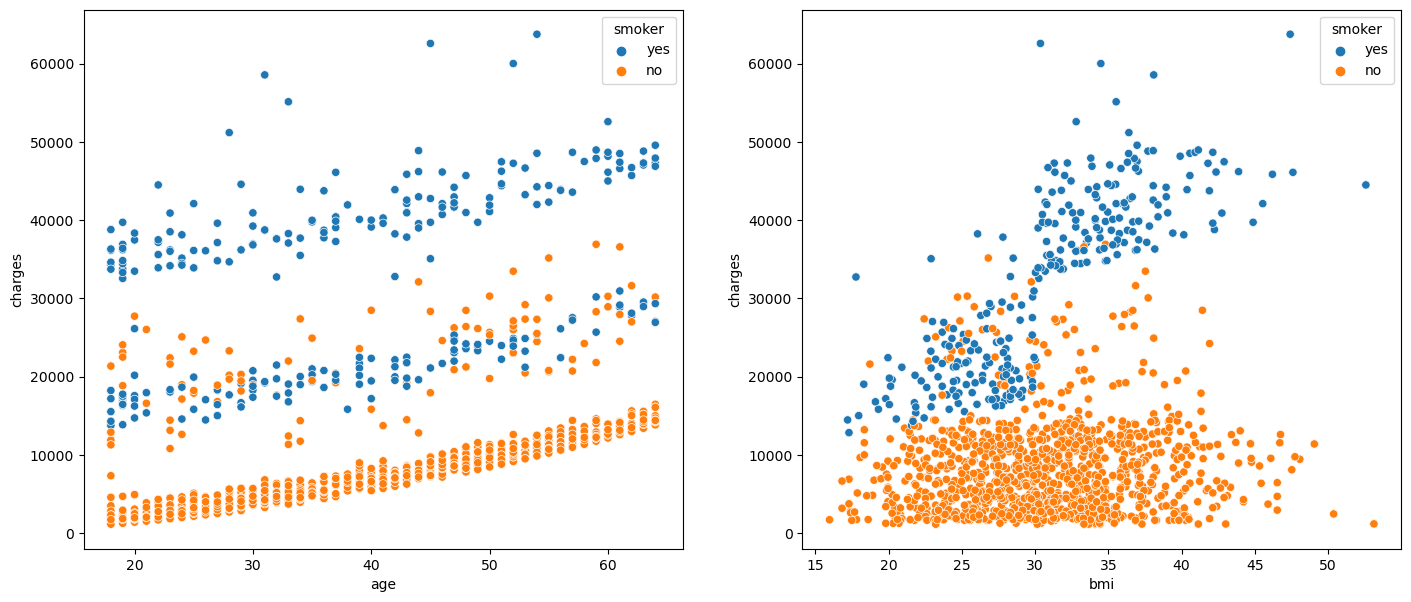

In [17]:
features = ['age','bmi']
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (17,7))
for i,col in enumerate(features):
    sns.scatterplot(data=df,x = col,y='charges',hue = 'smoker',ax=axes[i])

plt.show()


A clear distinction can be observed here between the charges that smokers have to pay. Also here we can see that as age increases premium price also goes up .

## Data Preprocessing
Data preprocessing is a technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: xlabel='age'>

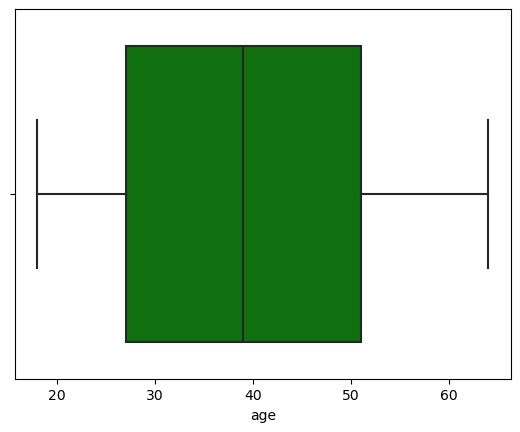

In [20]:
df.drop_duplicates(inplace=True)
sns.boxplot(x = df['age'],color='g')

We can see that there are no outliers present in age column

<Axes: xlabel='bmi'>

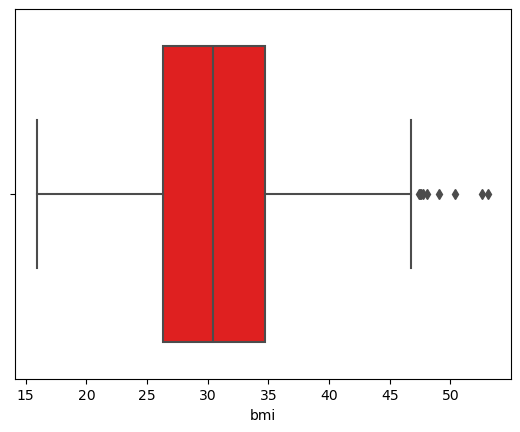

In [22]:
sns.boxplot(x = df['bmi'] ,color='r')

Due to the presence of outliers present in bmi column we need to treat the oultliers by replacing the values with mean as the bmi column consists of continuous data.

In [24]:
## Outlier treatment
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(.50)
q3 = df['bmi'].quantile(.75)
iqr = q3 - q1
lowlim = round(q1 - 1.5*iqr,4)
upplim = round(q3+1.5*iqr,4)
print(lowlim)
print(upplim)

13.675
47.315


In [76]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb = ArbitraryOutlierCapper(max_capping_dict={'bmi':upplim},min_capping_dict={'bmi':lowlim})
df[['bmi']] = arb.fit_transform(df[['bmi']])


<Axes: xlabel='bmi'>

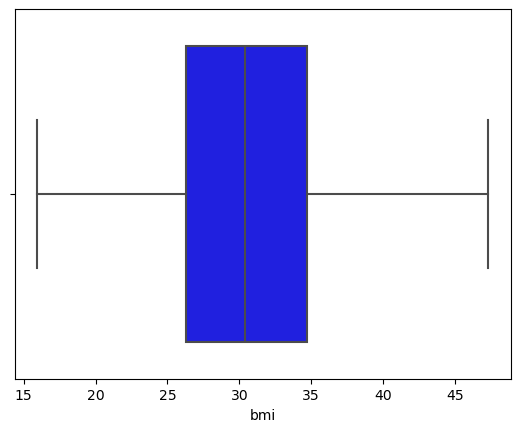

In [78]:
sns.boxplot(x = df['bmi'] ,color='b')
# After outlier removal

## Data Wrangling
Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [80]:
print(df['bmi'].skew())
print(df['age'].skew())

0.23289153320569975
0.054780773126998195


C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


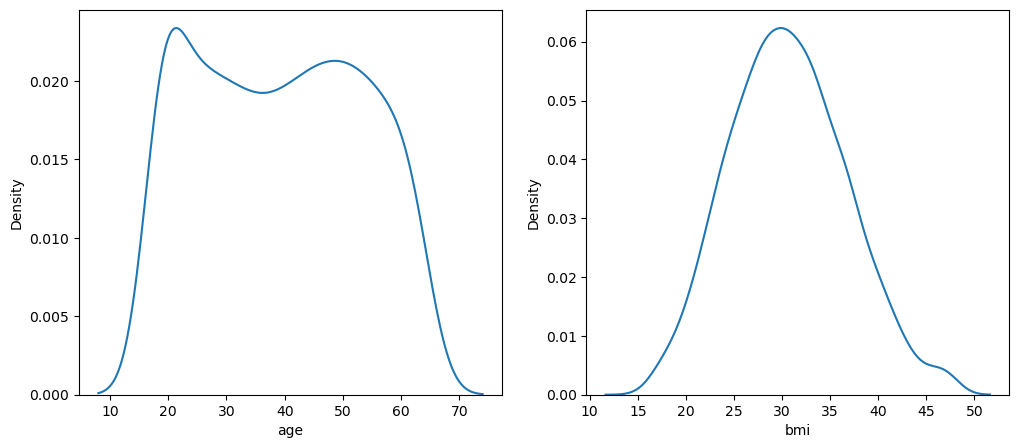

In [82]:
features = ['age','bmi']
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
for i,col in enumerate(features):
    sns.kdeplot(df[col],ax=axes[i])
plt.show()

As we can see age is positively skewed while  bmi is normally distributed

## Encoding 
encoding is to be done for discrete categorical data (sex,bmi,region).

In [32]:
# df['sex'] = df['sex'].map({'male':0,'female':1})
# df['smoker'] = df['smoker'].map({'yes':1,'no':0})
# df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['sex'] = le.fit_transform(df['sex'])

In [35]:
df['smoker'] = le.fit_transform(df['smoker'])

In [36]:
df['region'] = le.fit_transform(df['region'])

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [38]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


# Model Development

In [118]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741989,0.778965,0.747233
1,0.756522,0.708109,0.747233
2,0.729813,0.806985,0.747233
3,0.754367,0.734187,0.747233
4,0.743264,0.780474,0.747233
5,0.753409,0.733273,0.747233
6,0.741423,0.777238,0.747233
7,0.731825,0.797602,0.747233
8,0.752463,0.741935,0.747233
9,0.757217,0.720649,0.747233


We have identified the best random_state number for this data set as 42

In [121]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7298127441752071
0.8069852180198291
0.7472330007362453


In [129]:
# Using RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9735867068537906
0.8834744730239932
0.8349859197116537


# Hyper_parameter tuning using grid search

In [133]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

{'n_estimators': 150}
0.9744660970911678
0.883375029659393
0.8359401171407352
